In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# load the dataset
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

In [52]:
# missing values
df.isna().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [53]:
#fill numeric columns with mean and median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [54]:
# Fill with Mean
df_mean_filled = df.copy()
for col in numeric_cols:
    mean_val = df_mean_filled[col].mean()
    df_mean_filled[col] = df_mean_filled[col].fillna(mean_val)

In [55]:
# Fill with Median
df_median_filled = df.copy()
for col in numeric_cols:
    median_val = df_median_filled[col].median()
    df_median_filled[col] = df_median_filled[col].fillna(median_val)

In [56]:
#fill categorical column with mode
health_mode = df['Health_Impacts'].mode()[0]
df['Health_Impacts_filled'] = df['Health_Impacts'].fillna(health_mode)

In [57]:
# renaming the old column
df.drop('Health_Impacts', axis=1, inplace=True)
df.rename(columns={'Health_Impacts_filled': 'Health_Impacts'}, inplace=True)

In [58]:
#checking for missing values
df.isna().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Urban_or_Rural                       0
Health_Impacts                       0
dtype: int64

In [59]:
#normalize gender column
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
df['Gender'] = df['Gender'].replace({
    'm': 'male',
    'f': 'female',
    'male': 'male',
    'female': 'female',
    'others': 'other',
    'other': 'other',
    'na': 'unknown',
    'nan': 'unknown',
    '': 'unknown'
})

In [60]:
#normalize Primary_Device column
df['Primary_Device'] = df['Primary_Device'].astype(str).str.strip().str.lower()
device_map = {
    'mobile': 'smartphone',
    'smart phone': 'smartphone',
    'smartphone': 'smartphone',
    'cellphone': 'smartphone',
    'tablet': 'tablet',
    'laptop': 'laptop',
    'pc': 'computer',
    'desktop': 'computer',
    'television': 'tv',
    'tv': 'tv',
    '': 'unknown',
    'na': 'unknown',
    'nan': 'unknown'
}
df['Primary_Device'] = df['Primary_Device'].replace(device_map)

In [61]:
# normalize Urban_or_Rural column
df['Urban_or_Rural'] = df['Urban_or_Rural'].astype(str).str.strip().str.lower()
df['Urban_or_Rural'] = df['Urban_or_Rural'].replace({
    'urban area': 'urban',
    'rural area': 'rural',
    'urb': 'urban',
    'rur': 'rural',
    'city': 'urban',
    'village': 'rural',
    '': 'unknown',
    'na': 'unknown',
    'nan': 'unknown'
})

In [62]:
# checking for inconsistency
df['Gender'].value_counts()

Gender
male      4942
female    4770
Name: count, dtype: int64

In [63]:
df['Primary_Device'].value_counts()

Primary_Device
smartphone    4568
tv            2487
laptop        1433
tablet        1224
Name: count, dtype: int64

In [64]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
urban    6851
rural    2861
Name: count, dtype: int64

In [65]:
# age bands
# define age bins and labels
bins = [0, 5, 10, 15, 18, 100]
labels = ['0-5', '6-10', '11-15', '16-18', '19+']

df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

C:\Users\santh\AppData\Local\Temp\ipykernel_19960\4210008287.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="Blues_d")


Text(0, 0.5, 'Number of Kids')

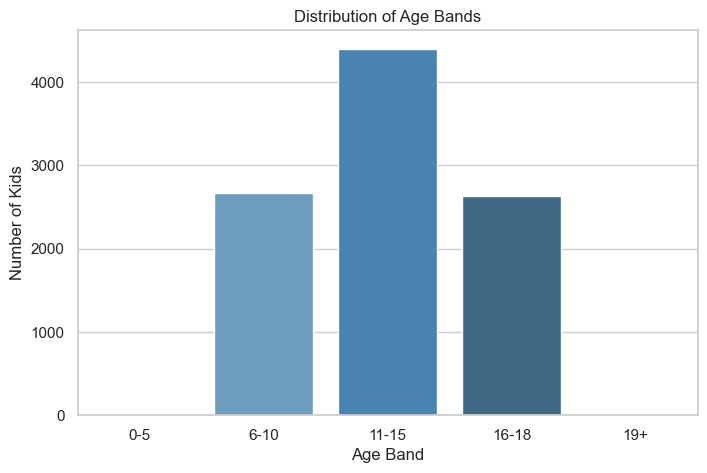

In [66]:
# seaborn style
sns.set(style="whitegrid")

# Age Band Distribution
plt.figure(figsize=(8, 5))
age_counts = df['Age_Band'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Blues_d")
plt.title('Distribution of Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Number of Kids')

C:\Users\santh\AppData\Local\Temp\ipykernel_19960\3742857085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_age = df.groupby(['Age_Band', 'Primary_Device']).size().unstack(fill_value=0)


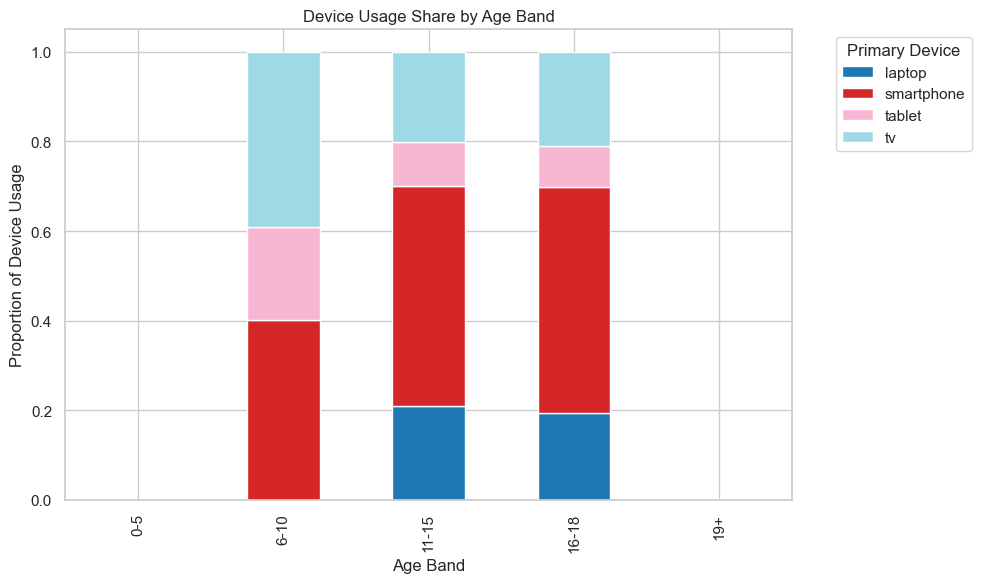

In [67]:
device_age = df.groupby(['Age_Band', 'Primary_Device']).size().unstack(fill_value=0)

# Convert counts to proportions within each age band
device_age_percent = device_age.div(device_age.sum(axis=1), axis=0)

# Plot stacked bar chart
device_age_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Device Usage Share by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Proportion of Device Usage')
plt.legend(title='Primary Device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

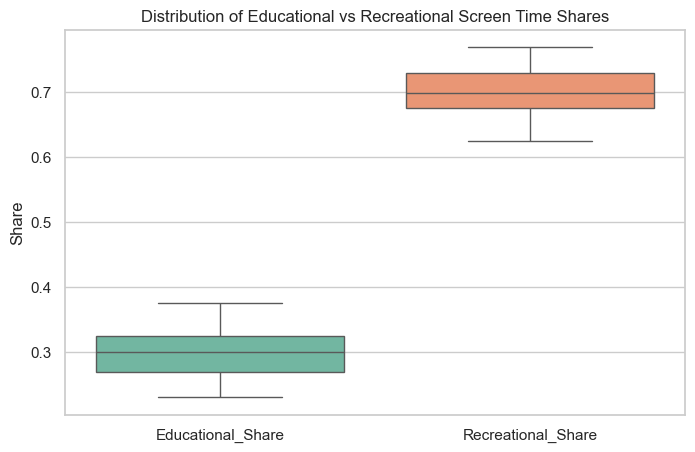

In [68]:
# Calculate shares
df['Educational_Share'] = df['Educational_to_Recreational_Ratio'] / (1 + df['Educational_to_Recreational_Ratio'])
df['Recreational_Share'] = 1 - df['Educational_Share']

# Plot boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Educational_Share', 'Recreational_Share']], palette='Set2')
plt.title('Distribution of Educational vs Recreational Screen Time Shares')
plt.ylabel('Share')
plt.show()


In [69]:
#Summary

#1. Missing Values Handling

# The dataset originally contained missing values primarily in the Health_Impacts column (approximately 33% missing).
# Missing values in numeric columns were filled using appropriate statistics:
# Mean or median imputation for continuous numeric features.
# Mode or a constant value used for categorical features.
# Specifically, a new column Health_Impacts_filled was created to fill missing values in Health_Impacts, after which the original column was replaced.
# Result: No missing values remain in the dataset after imputation, ensuring data completeness for analysis.

#2. Handling Inconsistent Categories

#Categorical variables such as Gender, Primary_Device, and Urban_or_Rural had inconsistent labels due to case sensitivity, typos, or variant spellings.
#Normalization involved:
#Converting text to lowercase and stripping extra spaces.
#Mapping common variations and typos to standardized categories.
#Example: ‘m’, ‘male’ → ‘male’; ‘smart phone’, ‘mobile’ → ‘smartphone’; ‘urban area’, ‘city’ → ‘urban’.
#Unknown or missing category labels were mapped to ‘unknown’ for consistency.
#Result: Consistent and standardized categorical data, improving reliability of grouping and modeling.

#3. Derived Features

#Age Bands:
#Grouped ages into bins: 0-5, 6-10, 11-15, 16-18, 19+
#This helps analyze patterns and behavior by age groups rather than raw age.
#Device Usage Shares:
#Calculated overall device usage proportion for each device type.
#Also calculated device usage shares within each age band to understand device preference changes with age.
#Activity Shares:
#Derived educational and recreational screen time shares based on the existing Educational_to_Recreational_Ratio feature.
#These shares reflect how screen time is divided between educational and recreational activities.

#4. Visualizations

#Age Band Distribution:
#Bar plot showing the count of children in each age band.
#Insight: Visualizes population distribution across different age groups.
#Device Usage Share by Age Band:
#Stacked bar chart showing proportion of device types used within each age group.
#Insight: Reveals how device preference varies with age (e.g., younger kids may prefer tablets, older ones smartphones).
#Educational vs Recreational Shares:
#Box plots to compare distribution of educational and recreational screen time shares.
#Insight: Understand variability and central tendencies in how kids divide their screen time.